In [165]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [166]:
import warnings 
warnings.filterwarnings('ignore')

In [167]:
pd.set_option('display.max_row',5000)

In [168]:
train_data = pd.read_csv("D:/Second_Sem/Second_Sem/Self_Prac/MachineHack/houseprice/Predicting-House-Prices-In-Bengaluru-Train-Data.csv")

In [169]:
test_data = pd.read_csv("D:/Second_Sem/Second_Sem/Self_Prac/MachineHack/houseprice/Predicting-House-Prices-In-Bengaluru-Test-Data.csv")

In [170]:
train_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [171]:
train_data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [172]:
#train_data['society'].value_counts()

In [173]:
train_data.isnull().sum()/len(train_data)*100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [174]:
train_data['size'] = train_data['size'].str.replace('[^0-9]',' ')

In [175]:
train_data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00


In [176]:
train_data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [177]:
#train_data['total_sqft'].value_counts()

In [178]:
train_data['total_sqft']=train_data['total_sqft'].replace({'2830 - 2882':2856,'2249.81 - 4112.19':3181,'1200 - 2400':1800,'3630 - 3800':3715,'4000 - 5249':4624.5,
                                 '524 - 894':709,'613 - 648':630.5,'1804 - 2273':2038.5,'1390 - 1600':1495,'1115 - 1130':1122.5,'1365 - 1700':1532.5,
                                 '1255 - 1350':1302.5,'2580 - 2591':2585.5,'645 - 936':790.5,'142.61Sq. Meter':1535,'1430 - 1630':1530,'620 - 934':777,
                                 '1618 - 1929':1773.5,'381 - 535':458,'1200 - 1800':1500,'3300 - 3335':3317.5,'1446 - 1506':1476,'1410 - 1710':1560,
                                 '850 - 1060':955,'4260 - 4408':4334,'596 - 804':700,'1210 - 1477':1343.5,'1020 - 1130':1075,'1079 - 1183':1131,
                                                          '716Sq. Meter':7706,'3425 -3435':3430,'3307 - 3464':3338,'500Sq. Yards':4500,'4500 - 5540':5020,
                                                          '1000 -1204':1102,'6Acres':261360,'1270 - 1275':1272,'706 - 716':711,'1120 - 1145':1132,'1310 - 1615':1462,
                                                          '1450 - 1950':1700,'1650 - 2538':2094,'1783 - 1878':1830,'1500Cents':653400,'132Sq. Yards':1188,'1450 - 1595':1522,
                                                          '1005.03 - 1252.49':1129, '1564 - 1850':1707,'45Sq. Yards':405,'670 - 980':825,'1482 -1684':1583,'1500 - 2400':1950,'5666 - 5669':5667,
                                                          '633 - 666':650,'1437 - 1629':1533,'1125 - 1500':1312,'4000 - 4450':4225,'4400 - 6640':5520,'3884 - 3550':3517,'315Sq. yards':2835,
                                                          '4050 - 4075':4062,'870 - 1080':975,'1200 - 1470':1335,'700 - 900':800,'1.26Acres':54885.6,'3010 - 3410':3210,'1660 - 1805':1732,
                                                          '300Sq. Yards':3240,'3450 - 3472':3461,'117Sq. Yards':1053,'1469 - 1766':1617,'1255 - 1863':1559,'610 - 615':612,'2Acres':87120,
                                                          '763 - 805':784,'2041 - 2090':2065,'2957 - 3450':3203,'697Sq. Meter':7502,'1574Sq. Yards':14166})

In [179]:
train_data['total_sqft'] = train_data['total_sqft'].replace({'1482 - 1846':1664,'188.89Sq. Yards':1700,'2725 - 3250':2987.5,'1042 - 1105':1073.5,
                                                            '2000 - 5634':3817,'1230 - 1490':1360,'2466 - 2856':2661,'981 - 1249':1115,'840 - 1010':925,
                                                            '1230 - 1290':1260,'1252 - 1375':1313, '1052 - 1322':1187,'1300 - 1405':1352.5,'3090 - 5002':4046,
                                                            '1.25Acres':54450,'854 - 960':907,'84.53Sq. Meter':903,'770 - 841':805.5,'850 - 1093':971.5,'122Sq. Yards':1098,
                                                            '3103 - 3890':3496.5,'3606 - 5091': 3496.5,'3606 - 5091':4348.5,'2462 - 2467':2464.5,'2150 - 2225':2187.5,'361.33Sq. Yards':3252,
                                                            '655 - 742':698,'1925 - 2680':2302,'1400 - 1421':1410,'3067 - 8156':5611,'1160 - 1195':1177,'547.34 - 827.31':687, '2806 - 3019':2912,
                                                            '2710 - 3360': 3035, '605 - 624':614,'1225  - 1495':1355,'2100 - 5405':3752,'1520 - 1740':1630,'34.46Sq. Meter':371,'660 - 780':720,
                                                            '1782 - 2000':1891,'934 - 1437':1185,'942 - 1117':1029,'888 - 1290':1089,'78.03Sq. Meter':840,'1Grounds':2400,'5.31Acres':231303,
                                                            '1100Sq. Meter':11840,'1500Sq. Meter':16145,'3436 - 3643':3539,'620 - 933':776,'204Sq. Meter':2196})

In [180]:
train_data['total_sqft']=train_data['total_sqft'].replace({'86.72Sq. Meter':933.5,'3293 - 5314':4304,'527 - 639':583,'45.06Sq. Meter':485,
                                                          '750 - 800':775,'24Sq. Meter':258,'660 - 670':665,'133.3Sq. Yards':1200,'598 - 958':778,
                                                          '799 - 803':801,'1974 - 2171':2071,'929 - 1078':1003,'704 - 730':717,'712 - 938':825,
                                                          '684 - 810':747,'980 - 1030':1005,'15574Sq. Yards':14166,'580 - 650':615,'1076 - 1199':1137,
                                                          '2470 - 2790': 2630,'120Sq. Yards':1080,'2.09Acres':91040,'629 - 1026':1730,'1100 - 1225':1162,
                                                          '151.11Sq. Yards':460, '800 - 2660':1730,'1145 - 1340': 1242,'1160 - 1315':1237,
                                                          '1408 - 1455':1431.5,'2695 - 2940':2817,'30Acres':1306799,'540 - 740':640,'2650-2990':2820,'4125Perch':1123031,
                                                          '4900 - 4940':4920,'783 - 943': 863,'650 - 665':657,'24Guntha':26135,'1133 - 1384':1258,'755 - 770':762,'385 - 440':412,
                                                          '1510 - 1670':1590,'3369 - 3464':3416, '943 - 1220':1081, '1235 - 1410':1372,'2204 - 2362':2283,'142.84Sq. Meter':1537,
                                                          '1610 - 1880':1745,'2800 - 2870':2835, '1010 - 1300':1155, '1791 - 4000':2895, '1140 - 1250':1195,'1195 - 1440':1317,
                                                          '1000 - 1285':1142,'2100 - 2850':2475, '2940Sq. Yards':21960,'1015 - 1540':1277,'1550 - 1590':1570,'4400 - 6800':5600,
                                                          '1100Sq. Yards':9900,'2563 - 2733':2648, '3Cents':1306,'3500 - 3600':3550,'1250 - 1305':1255,'38Guntha':41381})

In [181]:
train_data['total_sqft'] = train_data['total_sqft'].replace({'2528 - 3188':2858,'884 - 1116':1000,'15Acres':653400,'38Ghunta':41382,'1150-1194':1172,
                                                            '167Sq. Meter':1797,'1070 - 1315':1192,'3508 - 4201':3854,'1360 - 1890':1625,'1750 - 2640':2195,
                                                            '664 - 722':693,'596 - 861':729,'1349 - 3324':2336,'520 - 645':582,'540 - 670':582,'2805 - 3565':3185,
                                                            '1565 - 1595':1580,'660 - 700':680,'1520 - 1759':1640,'2400 - 2600': 2500,'1440 - 1884':1661, '3040Sq. Meter':32722,'1180 - 1630':1405,
                                                            '1574Sq. Meter':14166,'2650 - 2990':2820,'650 - 760':705,'1004 - 1204':1104,'1445 - 1455':1450,'615 - 985':800,
                                                            '3425 - 3435':3430,'3484 - 3550':3517,'2215 - 2475':2345,'1482 - 1684':1583,'1215 - 1495':1355,'1000Sq. Meter':10764,
                                                            '315Sq. Yards':3391,'1255 - 1375':1315,'1150 - 1194':1172,'540 - 565':555})

In [182]:
train_data['total_sqft'] = train_data['total_sqft'].astype(float)

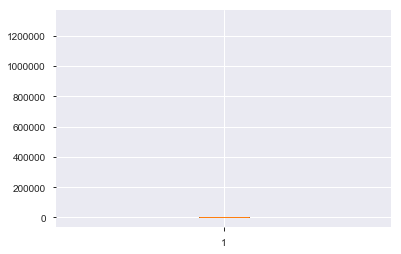

In [183]:
plt.boxplot(train_data['total_sqft'])
plt.show()

In [184]:
train_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200.0,2.0,1.0,51.00


In [185]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null float64
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(4), object(5)
memory usage: 936.6+ KB


In [186]:
## Now Impute the both column 

In [187]:
train_data['bath'].fillna(0,inplace=True)
train_data['balcony'].fillna(0,inplace=True)
train_data['size'].fillna(0,inplace=True)

In [188]:
train_data['society'].fillna(method = 'ffill',inplace=True)
train_data['location'].fillna(method = 'ffill',inplace=True)

In [189]:
train_data['size'] = train_data['size'].astype(int)

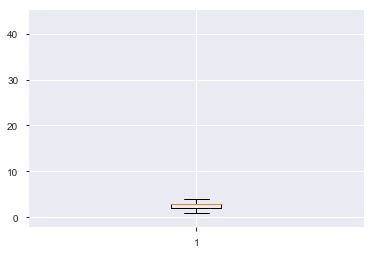

In [190]:
plt.boxplot(train_data['size'])
plt.show()

In [191]:
#### train_data['size']= train_data['size'].clip_upper(train_data['size'].quantile(0.9)) 
train_data['size']= train_data['size'].clip_lower(train_data['size'].quantile(0.01)) 
train_data['size']= train_data['size'].clip_upper(train_data['size'].quantile(0.90)) 

In [192]:
train_data['total_sqft'] = train_data['total_sqft'].clip_upper(train_data['total_sqft'].quantile(0.90))
train_data['total_sqft'] = train_data['total_sqft'].clip_lower(train_data['total_sqft'].quantile(.1))

In [193]:
df = train_data.loc[:,['size','price']]
df.head()

,size,price
0,2,39.07
1,4,120.00
2,3,62.00
3,3,95.00
4,2,51.00


In [194]:
df1 = train_data.loc[:,['total_sqft','price']]
df1.head(2)

,total_sqft,price
0,1056.0,39.07
1,2430.0,120.00


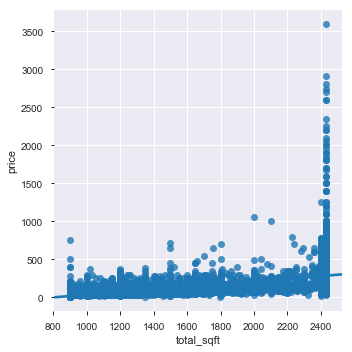

In [195]:
sns.lmplot(x='total_sqft',y='price',data=df1)
plt.show()

In [196]:
df3=train_data.loc[:,['size','total_sqft']]

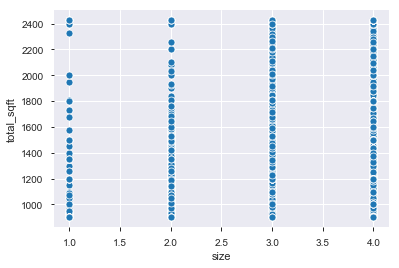

In [197]:
sns.scatterplot(x='size',y='total_sqft',data=df3)
plt.show()

In [198]:
train_data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2430.0,5.0,3.0,120.00


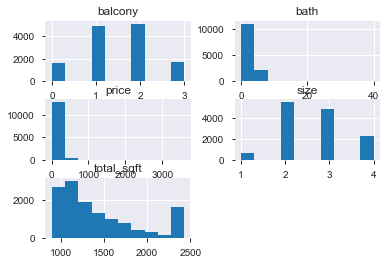

In [199]:
train_data.hist()
plt.show()

In [200]:
#train_data['Log_Price'] = np.log(train_data['price']+1)

In [201]:
#train_data['Log_Bath'] = np.log(train_data['bath'])

In [202]:
#train_data['size'] = train_data['size'].str.replace('[a-zA-Z]','').head()

In [203]:
def ready(x):
    if x=='18':
        return 1
    elif x=='19':
        return 2
    elif x=='17':
        return 3
    elif x=='20':
        return 4
    elif x=='21':
        return 5
    elif x=='22':
        return 6
    elif x=='14':
        return 7
    elif x=='15':
        return 8
    elif x=='16':
        return 9
    elif x=='14':
        return 10
    elif x=='Re':
        return 11
    elif x=='Im':
        return 12

In [204]:
train_data['availability']=train_data.availability.str[:2].apply(ready)

In [205]:
train_data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,2,Electronic City Phase II,2,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,11,Chikka Tirupathi,4,Theanmp,2430.0,5.0,3.0,120.00


In [206]:
import pandas_profiling as pf
pf.ProfileReport(train_data)

Number of variables,9
Number of observations,13320
Total Missing (%),0.0%
Total size in memory,936.6 KiB
Average record size in memory,72.0 B
Numeric,6
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [207]:
from sklearn.preprocessing import LabelEncoder

In [208]:
train_data['location'] = LabelEncoder().fit_transform(train_data['location'].values)

In [209]:
train_data['society'] = LabelEncoder().fit_transform(train_data['society'].values)

In [210]:
train_data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [211]:
train_data['area_type'] = train_data['area_type'].replace({'Super built-up  Area':1})

In [212]:
train_data['area_type'] = train_data['area_type'].replace({'Built-up  Area':2,'Plot  Area':3,'Carpet  Area':4})

In [213]:
train_data.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,1,2,419,2,464,1056.0,2.0,1.0,39.07
1,3,11,317,4,2439,2430.0,5.0,3.0,120.00
2,2,11,1179,3,2439,1440.0,2.0,3.0,62.00
3,1,11,757,3,2186,1521.0,3.0,1.0,95.00
4,1,11,716,2,2186,1200.0,2.0,1.0,51.00


In [214]:
train_data['area_type'].value_counts()

1    8790
2    2418
3    2025
4      87
Name: area_type, dtype: int64

In [215]:
train_data.dtypes

area_type         int64
availability      int64
location          int32
size              int64
society           int32
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [216]:
train_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,1,2,419,2,464,1056.0,2.0,1.0,39.07
1,3,11,317,4,2439,2430.0,5.0,3.0,120.00
2,2,11,1179,3,2439,1440.0,2.0,3.0,62.00
3,1,11,757,3,2186,1521.0,3.0,1.0,95.00
4,1,11,716,2,2186,1200.0,2.0,1.0,51.00


In [217]:
train_data.corr()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
area_type,1.000000,0.135529,-0.022232,0.339961,-0.006368,0.083426,0.336134,-0.147848,0.237181
availability,0.135529,1.000000,0.001404,0.077930,-0.041412,0.029476,0.076959,0.087612,0.032986
location,-0.022232,0.001404,1.000000,0.007790,-0.015493,0.038404,0.003253,0.002595,0.011435
size,0.339961,0.077930,0.007790,1.000000,-0.012885,0.640662,0.727041,0.151952,0.449244
society,-0.006368,-0.041412,-0.015493,-0.012885,1.000000,-0.007572,-0.004480,-0.027376,-0.021647
total_sqft,0.083426,0.029476,0.038404,0.640662,-0.007572,1.000000,0.510510,0.139233,0.555922
bath,0.336134,0.076959,0.003253,0.727041,-0.004480,0.510510,1.000000,0.088754,0.448081
balcony,-0.147848,0.087612,0.002595,0.151952,-0.027376,0.139233,0.088754,1.000000,0.019648
price,0.237181,0.032986,0.011435,0.449244,-0.021647,0.555922,0.448081,0.019648,1.000000


In [218]:
import seaborn as sns
%matplotlib inline

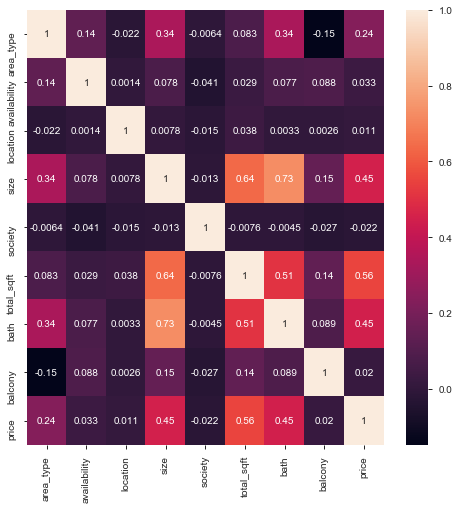

In [219]:
plt.figure(figsize=(8,8))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,explained_variance_score,mean_squared_error

In [221]:
train_data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [222]:
train_data.dtypes

area_type         int64
availability      int64
location          int32
size              int64
society           int32
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [227]:
train,test = train_test_split(train_data,test_size=.3,random_state=100)

In [228]:
train_y = train['price']
test_y = test['price']

train_x = train.drop('price',axis=1)
test_x = test.drop('price',axis=1)

In [229]:
lm = LinearRegression()
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [230]:
lm_pred  = lm.predict(test_x)
lm_pred[:5]

array([54.25882067, 76.91739624, 34.90637383,  7.56182688, 72.99842676])

In [231]:
lm_mse = mean_squared_error(test_y,lm_pred)
lm_mse

12627.736875838893

In [232]:
rmse_lm = np.sqrt(lm_mse)
rmse_lm

112.3732035488839

In [233]:
r2_lm =r2_score(test_y,lm_pred)
r2_lm

0.37722742733033077

In [234]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [235]:
rf = RandomForestRegressor()
rf.fit(train_x,train_y)

rf_pred = rf.predict(test_x)
rf_pred[:5]


array([49.30533333, 79.024     , 71.164     , 40.1       , 78.3       ])

In [236]:
rf_df = pd.DataFrame({'Actual':test_y,'Pred':rf_pred})
rf_df.head()

,Actual,Pred
8296,46.79,49.305333
2671,72.00,79.024000
4090,35.00,71.164000
11737,45.00,40.100000
9770,94.00,78.300000


In [237]:
rf_mse = mean_squared_error(test_y,rf_pred)

rf_rmse = np.sqrt(rf_mse)

print(rf_mse, rf_rmse)

11149.699916226593 105.59213946230369


In [238]:
r2_rf = r2_score(test_y,rf_pred)
r2_rf

0.4501210019184898

In [239]:
gr = GradientBoostingRegressor()
gr.fit(train_x,train_y)

gr_pred = gr.predict(test_x)
gr_pred[:5]

array([57.12149476, 70.3768223 , 50.40406428, 50.90548871, 67.82579274])

In [240]:
gr_df = pd.DataFrame({'Actual':test_y,'Pred':gr_pred})
gr_df.head()

,Actual,Pred
8296,46.79,57.121495
2671,72.00,70.376822
4090,35.00,50.404064
11737,45.00,50.905489
9770,94.00,67.825793


In [241]:
r2_gr = r2_score(test_y,gr_pred)
r2_gr

0.5282304225040477

In [242]:
import xgboost

In [243]:
xgb = xgboost.XGBRegressor()
xgb.fit(train_x,train_y)
xgb_pred = xgb.predict(test_x)
xgb_pred[:5]

array([57.20679 , 70.34548 , 49.702114, 50.21857 , 67.75298 ],
      dtype=float32)

In [244]:
xgb_mse = mean_squared_error(test_y,xgb_pred)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_mse, xgb_rmse)

9917.876244112675 99.58853470210651


In [245]:
xgb_r2 = r2_score(test_y,xgb_pred)
xgb_r2

0.5108718716032702

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_model = RandomForestRegressor()
params ={'max_depth':list(range(3,11)), 'min_samples_split':[8,5, 6, 10,11, 12,7]}



random_cv = RandomizedSearchCV(rf_model, params)
random_cv.fit(train_x, train_y)
random_cv.best_params_

In [ ]:
gr_model = GradientBoostingRegressor()
params ={'max_depth':list(range(4,11)), 'loss' : ['ls', 'lad', 'huber', 'quantile'], 'min_samples_split':[8,5, 6, 10,11, 12,7],'n_estimators':[100,200,500,1000]}



random_cv = RandomizedSearchCV(gr_model, params)
random_cv.fit(train_x, train_y)
random_cv.best_params_

In [ ]:
gr1_model = GradientBoostingRegressor(n_estimators=500,min_samples_split=10,max_depth=5,loss='huber')
gr1_model.fit(train_x,train_y)

gr1_pred = gr1_model.predict(test_x)
gr1_pred[:5]

In [ ]:
gr1_df = pd.DataFrame({'Actual':test_y,'Predict':gr1_pred})
gr1_df.head()

In [ ]:
gr1_mse = mean_squared_error(test_y,gr1_pred)
gr1_mse

In [ ]:
gr1_rmse = np.sqrt(gr1_mse)
gr1_rmse

In [ ]:
gr1_r2 = r2_score(test_y,gr1_pred)
gr1_r2

# Using Standard Scaler

In [ ]:
train_x.head(2)

In [ ]:
test_x.head(2)

In [ ]:
train_y.head(2)

In [ ]:
test_y.head(2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

In [ ]:
lr = LinearRegression()
lr.fit(train_x_scaled,train_y)
lr_pred = lr.predict(test_x_scaled)
lr_pred[:5]

In [ ]:
lr_r2 = r2_score(test_y,lr_pred)
lr_r2

In [ ]:
train_data.head()

In [ ]:
train_data.dtypes

In [ ]:
train_dummy = pd.get_dummies(train_data)

In [ ]:
train,test = train_test_split(train_dummy,test_size=.33,random_state=33)

In [ ]:
ytrain = train['price']
ytest = test['price']

xtrain = train.drop('price',axis = 1)
xtest = test.drop('price',axis=1)

In [ ]:
lm_d = LinearRegression()
lm_d.fit(xtrain,ytrain)

lm_pred = lm_d.predict(xtest)
lm_pred[:5]

In [ ]:
mse_lm1 = mean_squared_error(ytest,lm_pred)
mse_lm1

In [ ]:
rmse_lm1 = np.sqrt(mse_lm1)
rmse_lm1

In [ ]:
r2 = r2_score(ytest,lm_pred)
r2

In [ ]:
rf2 = RandomForestRegressor()

rf2.fit(xtrain,ytrain)
rf2_pred = rf2.predict(xtest)
rf2_pred[:5]


In [ ]:
rf_df = pd.DataFrame({'Actual':ytest,'Pred':rf2_pred})
rf_df.head(5)

In [ ]:
mse_rf2 = mean_squared_error(ytest,rf2_pred)
mse_rf2

In [ ]:
rf2_rmse = np.sqrt(mse_rf2)
rf2_rmse

In [ ]:
rf2r = r2_score(ytest,rf2_pred)
rf2r

In [ ]:
gr2 = GradientBoostingRegressor()

gr2.fit(xtrain,ytrain)

gr2_pred = gr2.predict(xtest)
gr2_pred[:5]

In [ ]:
gr2_df = pd.DataFrame({'Actual':ytest,'Pred':gr2_pred})
gr2_df.head()

In [ ]:
gr2_mse = mean_squared_error(ytest,rf2_pred)
gr2_mse

In [ ]:
gr2_rmse = np.sqrt(gr2_mse)
gr2_rmse

In [ ]:
gr2_r2 = r2_score(ytest,rf2_pred)
gr2_r2

In [ ]:
train_data.head()

In [ ]:
new_df =train_data.drop('location',axis=1)

In [ ]:
new_df = train_data.drop('society',axis=1)

In [ ]:
new_df.dtypes

In [ ]:
train,test = train_test_split(new_df,test_size = .30,random_state = 33)

In [ ]:
tra_x = train.drop('price',axis=1)
tes_x = test.drop('price',axis=1)

tra_y = train['price']
tes_y = test['price']

In [ ]:
gr_tes = 

In [ ]:
sns.jointplot(x='Actual',y='Pred',data=gr2_df)
plt.show()

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
lm = smf.ols('price~area_type+availability+size+total_sqft+bath+balcony',train_data).fit()

In [ ]:
print(lm.summary())

In [ ]:
train_data.head(2)

In [ ]:
new_df = train_data.drop('society',axis=1)

In [ ]:
new_df.head(2)

In [ ]:
new_df['location'].value_counts()

In [ ]:
new_df['location'] = LabelEncoder().fit_transform(new_df['location'].values)

In [ ]:
new_df['location'].describe()

In [ ]:
plt.boxplot(new_df['location'])
plt.show()

In [ ]:
new_df.dtypes

In [ ]:
train,test = train_test_split(new_df,test_size = .33,random_state = 100)

In [ ]:
xtrain = train.drop('price',axis=1)
xtest = test.drop('price',axis=1)

ytrain = train['price']
ytest = test['price']

In [ ]:
mod = RandomForestRegressor()
mod.fit(xtrain,ytrain)

pred_rf3 = mod.predict(xtest)
pred_rf3[:5]

In [ ]:
mod_df =pd.DataFrame({'Actual':ytest,'Predict':pred_rf3})
mod_df.head(5)

In [ ]:
mse_mod = mean_squared_error(ytest,pred_rf3)
mse_mod

In [ ]:
rmse_mod = np.sqrt(mse_mod)
rmse_mod

In [ ]:
r2_mod = r2_score(ytest,pred_rf3)
r2_mod

In [ ]:
mod = RandomForestRegressor()
mod.fit(xtrain,ytrain)

pred_rf3 = mod.predict(xtest)
pred_rf3[:5]

In [ ]:
test_data = pd.read_csv("D:/Second_Sem/Second_Sem/Self_Prac/MachineHack/houseprice/Predicting-House-Prices-In-Bengaluru-Test-Data.csv")

In [ ]:
test_data.head()

In [ ]:
test_data.drop('price',axis=1,inplace=True)

In [ ]:
test_data.isnull().sum()

In [ ]:
test_data['bath'].fillna(0,inplace=True)
test_data['balcony'].fillna(0,inplace=True)
test_data['size'].fillna(0,inplace=True)

In [ ]:
test_data['society'].fillna(method = 'ffill',inplace=True)
test_data['location'].fillna(method = 'ffill',inplace=True)

In [ ]:
test_data['area_type'] = test_data['area_type'].replace({'Super built-up  Area':1})

In [ ]:
test_data['area_type'] = test_data['area_type'].replace({'Built-up  Area':2,'Plot  Area':3,'Carpet  Area':4})

In [ ]:
test_data['location'] = LabelEncoder().fit_transform(test_data['location'].values)

In [ ]:
test_data['society'] = LabelEncoder().fit_transform(test_data['society'].values)

In [ ]:
test_data['availability']=test_data.availability.str[:2].apply(ready)

In [ ]:
test_data['size'] = test_data['size'].str.replace('[^0-9]',' ')

In [ ]:
test_data.shape

In [ ]:
test_data['total_sqft'].value_counts()

In [ ]:
test_data['total_sqft'] = test_data['total_sqft'].replace({'534 - 763':648,'1741 - 2074':1907,'1892 - 2798':2345,'530 - 575':552,
                                                          '1160 - 1260':1210,'475 - 1058.27':767,'1200 - 2000':1600,'2563 - 3914':3238,
                                                          '600 - 4000':2300,'524 - 894':709,'660 - 690':675,'100Sq. Meter':1076,'2830 - 2882':2856,
                                                          '1152 - 1197':1175,'700 - 800':750,'5Acres':217800,'1498 - 1523':1510,'1975 - 2289':2132,
                                                          '3307 - 3464':3385,'1691 - 2170':1930,'2695 - 2940':2818,'1165 - 1225':1195})

In [ ]:
test_data['total_sqft'] = test_data['total_sqft'].astype(float)

In [ ]:
plt.boxplot(test_data['total_sqft'])
plt.show()

In [ ]:
test_data['total_sqft'] = test_data['total_sqft'].clip_upper(test_data['total_sqft'].quantile(0.90))
test_data['total_sqft'] = test_data['total_sqft'].clip_lower(test_data['total_sqft'].quantile(.1))

In [ ]:
test_data.dtypes

In [ ]:
test_data['size'] = test_data['size'].astype(float)

In [ ]:
test_data.head(2)

In [ ]:
test_data.isnull().sum()

In [ ]:
gr1_model = GradientBoostingRegressor(n_estimators=500,min_samples_split=10,max_depth=5,loss='huber')
gr1_model.fit(train_x,train_y)

gr1_pred = gr1_model.predict(test_data)
gr1_pred[:5]

In [ ]:
answer=pd.DataFrame(gr1_pred)

In [ ]:
answer=answer.rename(columns={0:'price'})

In [ ]:
answer.head()

In [ ]:
test_data.head()

In [ ]:
test_data2 = test_data.drop('society',axis=1)

In [ ]:
test_data2.head(2)

In [ ]:
!pip install XlsxWriter


In [ ]:
writer = pd.ExcelWriter('example.xlsx', engine='xlsxwriter')


In [ ]:
answer.to_excel(writer, 'Sheet1')


In [ ]:
writer.save()

In [ ]:
gr2 = GradientBoostingRegressor()

gr2.fit(xtrain,ytrain)

gr2_pred = gr2.predict(test_data2)
gr2_pred[:5]

In [ ]:
answer2 = pd.DataFrame(gr2_pred)
answer2.head(5)

In [ ]:
answer2=answer2.rename(columns={0:'price'})
answer2.head(4)

In [ ]:
sample = pd.ExcelWriter('HousePrice.xlsx',engine='xlsxwriter')

In [ ]:
answer2.to_excel(sample, 'Sheet1')

In [ ]:
sample.save()